In [1]:
import glob
import os
import subprocess
import tarfile
import wget

import random
import numpy as np
import pandas as pd
import torch

from sklearn.model_selection import train_test_split

import nemo
import nemo.collections.tts as nemo_tts

import json
import librosa

import librosa
import json
import copy

from omegaconf import DictConfig
import copy

import pytorch_lightning as pl
from IPython.utils import io
from datetime import datetime
import json

/media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/apex/pyprof/__init__.py:5: FutureWarning: pyprof will be removed by the end of June, 2022
  warnings.warn("pyprof will be removed by the end of June, 2022", FutureWarning)
################################################################################
### WARNING, path does not exist: KALDI_ROOT=media/boris/F/pykaldi/kaldi
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################

[NeMo W 2022-05-26 19:25:03 experimental:27] Module <class 'nemo.collections.nlp.data.language_modeling.megatron.megatron_batch_samplers.MegatronPretrainingRandomBatchSampler'> is experimental, not ready for production and is not fully supported. Use at your own risk.


In [2]:
import os
from omegaconf import DictConfig

try:
    from ruamel.yaml import YAML
except ModuleNotFoundError:
    from ruamel_yaml import YAML

yaml = YAML(typ='safe')

In [11]:
models = {
#     'tacotron2': {
#         'config_path': './conf/tacotron2.yaml',
#         'class': nemo_tts.models.Tacotron2Model
#     },
#     'glow_tts': {
#         'config_path': './conf/glow_tts.yaml',
#         'class': nemo_tts.models.GlowTTSModel
#     },
#     'fastpitch': {
#         'config_path': './conf/fastpitch.yaml',
#         'class': nemo_tts.models.FastPitchModel
#     },
#     'fastspeech2': {
#         'config_path': './conf/fastspeech2.yaml',
#         'class': nemo_tts.models.Tacotron2Model
#     },
    'mixertts': {
        'config_path': './conf/mixer-tts.yaml',
        'class': nemo_tts.models.MixerTTSModel
    },
#     'mixerttsx': {
#         'config_path': './conf/mixer-tts-x.yaml',
#         'class': nemo_tts.models.MixerTTSModel
#     },
}

In [12]:
estimated_time = {}

for model_name in models:
    print(model_name)
    config_path = models[model_name]['config_path']
    with open(config_path) as f:
        config = yaml.load(f)
    
#     try:
    model = models[model_name]['class'].from_config_dict(DictConfig(config['model']))
    
    trainer = pl.Trainer(devices=1, accelerator='gpu', max_epochs=1,
                         check_val_every_n_epoch=5)
    
    training_start = datetime.now()
    trainer.fit(model)
    estimated_time[model_name] = datetime.now() - training_start

mixertts


InterpolationResolutionError: Recursive interpolation detected
    full_key: pitch_fmin
    object_type=dict

In [14]:
with open('/media/boris/F/Research_final/conf/mixer-tts.yaml') as f:
     cfg = yaml.load(f)

model = nemo_tts.models.MixerTTSModel.from_config_dict(DictConfig(cfg['model']))

[NeMo I 2022-05-26 19:30:26 tokenize_and_classify:88] Creating ClassifyFst grammars.


[NeMo W 2022-05-26 19:30:29 g2ps:84] apply_to_oov_word=None, it means that some of words will remain unchanged if they are not handled by one of rule in self.parse_one_word(). It is useful when you use tokenizer with set of phonemes and chars together, otherwise it can be not.


[NeMo I 2022-05-26 19:30:30 data:173] Loading dataset from /media/boris/F/Research_final/data/an4/paired.json.



0it [00:00, ?it/s]
1it [00:00,  5.25it/s]
2it [00:00,  5.38it/s]
3it [00:00,  5.43it/s]
4it [00:00,  5.40it/s]
5it [00:00,  5.42it/s]
6it [00:01,  5.33it/s]
7it [00:01,  5.36it/s]
8it [00:01,  5.28it/s]
9it [00:01,  5.32it/s]
10it [00:01,  5.35it/s]

[NeMo I 2022-05-26 19:30:32 data:207] Loaded dataset with 10 files.
[NeMo I 2022-05-26 19:30:32 data:209] Dataset contains 0.01 hours.
[NeMo I 2022-05-26 19:30:32 data:297] Pruned 0 files. Final dataset contains 10 files
[NeMo I 2022-05-26 19:30:32 data:299] Pruned 0.00 hours. Final dataset contains 0.01 hours.


[NeMo I 2022-05-26 19:30:32 data:173] Loading dataset from /media/boris/F/Research_final/data/an4/test_manifest.json.



0it [00:00, ?it/s]
1it [00:00,  5.16it/s]
2it [00:00,  5.18it/s]
3it [00:00,  5.25it/s]
4it [00:00,  5.18it/s]
5it [00:00,  5.26it/s]
6it [00:01,  5.20it/s]
7it [00:01,  5.21it/s]
8it [00:01,  5.30it/s]
9it [00:01,  5.31it/s]
10it [00:01,  5.25it/s]

[NeMo I 2022-05-26 19:30:34 data:207] Loaded dataset with 10 files.
[NeMo I 2022-05-26 19:30:34 data:209] Dataset contains 0.01 hours.
[NeMo I 2022-05-26 19:30:34 data:297] Pruned 0 files. Final dataset contains 10 files
[NeMo I 2022-05-26 19:30:34 data:299] Pruned 0.00 hours. Final dataset contains 0.01 hours.


[NeMo I 2022-05-26 19:30:34 features:259] PADDING: 1
[NeMo I 2022-05-26 19:30:34 features:276] STFT using torch


In [15]:
checkpoint = torch.load('/media/boris/F/Research_final/notebooks/spec_gen_saves/just_last_51-v1.ckpt')
model.load_state_dict(checkpoint['state_dict'], strict=True)

<All keys matched successfully>

In [16]:
from nemo.collections.tts.models import HifiGanModel

vocoder = HifiGanModel.from_pretrained(model_name="tts_hifigan")

[NeMo I 2022-05-26 19:31:02 cloud:56] Found existing object /home/boris/.cache/torch/NeMo/NeMo_1.8.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.
[NeMo I 2022-05-26 19:31:02 cloud:62] Re-using file from: /home/boris/.cache/torch/NeMo/NeMo_1.8.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2022-05-26 19:31:02 common:747] Instantiating model from pre-trained checkpoint


[NeMo W 2022-05-26 19:31:04 modelPT:148] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2022-05-26 19:31:04 modelPT:155] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2022-05-26 19:31:04 features:259] PADDING: 0
[NeMo I 2022-05-26 19:31:04 features:276] STFT using torch


[NeMo W 2022-05-26 19:31:04 features:233] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2022-05-26 19:31:04 features:259] PADDING: 0
[NeMo I 2022-05-26 19:31:04 features:276] STFT using torch
[NeMo I 2022-05-26 19:31:04 save_restore_connector:209] Model HifiGanModel was successfully restored from /home/boris/.cache/torch/NeMo/NeMo_1.8.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


In [98]:

def infer(spec_gen_model, vocoder_model, str_input, speaker = None):
    """
    Synthesizes spectrogram and audio from a text string given a spectrogram synthesis and vocoder model.
    
    Arguments:
    spec_gen_model -- Instance of FastPitch model
    vocoder_model -- Instance of a vocoder model (HiFiGAN in our case)
    str_input -- Text input for the synthesis
    speaker -- Speaker number (in the case of a multi-speaker model -- in the mixing case)
    
    Returns:
    spectrogram, waveform of the synthesized audio.
    """
    parser_model = spec_gen_model
    with torch.no_grad():
        parsed = parser_model.parse(str_input)
#         print(parsed)
        if speaker is not None:
            speaker = torch.tensor([speaker]).long().cuda()
        spectrogram = spec_gen_model.generate_spectrogram(tokens=parsed)
        audio = vocoder_model.convert_spectrogram_to_audio(spec=spectrogram)
        
    if spectrogram is not None:
        if isinstance(spectrogram, torch.Tensor):
            spectrogram = spectrogram.to('cpu').numpy()
        if len(spectrogram.shape) == 3:
            spectrogram = spectrogram[0]
    if isinstance(audio, torch.Tensor):
        audio = audio.to('cpu').numpy()
    return spectrogram, audio

spectrogram, audio = infer(model.cuda(), vocoder, "the old press yard has been fully described in a previous chapter")

[NeMo W 2022-05-26 19:22:58 mixer_tts:648] parse() is meant to be called in eval mode.


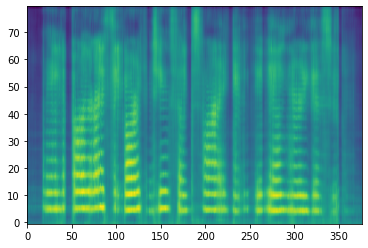

In [99]:
from matplotlib.pyplot import imshow

imshow(spectrogram, origin="lower", aspect = "auto")


In [100]:
import IPython.display as ipd

ipd.display(ipd.Audio(audio, rate=22050))

In [101]:
sf.write('test.wav', audio[0], 22050)

In [67]:
#  Method described here https://stackoverflow.com/questions/15311853/plot-spectogram-from-mp3

import librosa
import librosa.display
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp

def plot_mp3_matplot(filename):
    """
    plot_mp3_matplot -- using matplotlib to simply plot time vs amplitude waveplot
    
    Arguments:
    filename -- filepath to the file that you want to see the waveplot for
    
    Returns -- None
    """
    
    # sr is for 'sampling rate'
    # Feel free to adjust it
    x, sr = librosa.load(filename, sr=44100)
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, sr=sr)

def convert_audio_to_spectogram(filename):
    """
    convert_audio_to_spectogram -- using librosa to simply plot a spectogram
    
    Arguments:
    filename -- filepath to the file that you want to see the waveplot for
    
    Returns -- None
    """
    
    # sr == sampling rate 
    x, sr = librosa.load(filename, sr=44100)
    
    # stft is short time fourier transform
    X = librosa.stft(x)
    
    # convert the slices to amplitude
    Xdb = librosa.amplitude_to_db(abs(X))
    
    # ... and plot, magic!
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()
    
# same as above, just changed the y_axis from hz to log in the display func    
def convert_audio_to_spectogram_log(filename):
    x, sr = librosa.load(filename, sr=22050)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'log')
    plt.colorbar()    

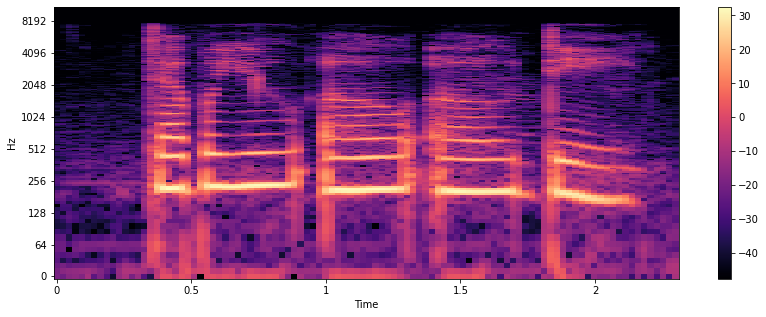

In [86]:
convert_audio_to_spectogram_log('/media/boris/F/Research_final/notebooks/an4/wav/an4test_clstk/fcaw/cen1-fcaw-b.wav')

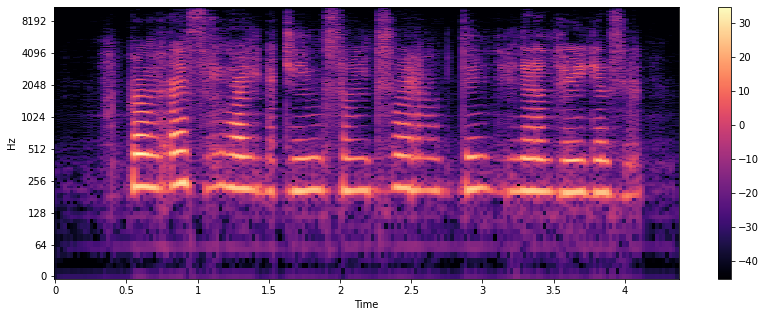

In [78]:
convert_audio_to_spectogram_log('test.wav')

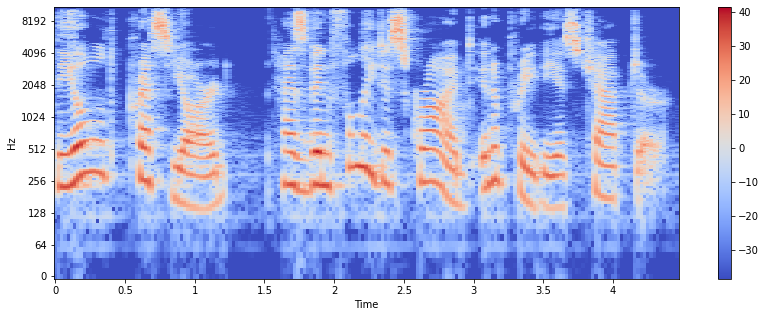

In [83]:
convert_audio_to_spectogram_log('/media/boris/F/datasets/LJSpeech-1.1/wavs/LJ003-0188.wav')

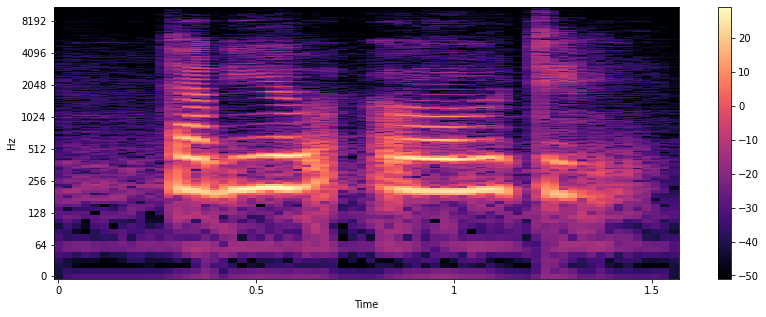

In [84]:
convert_audio_to_spectogram_log('test.wav')

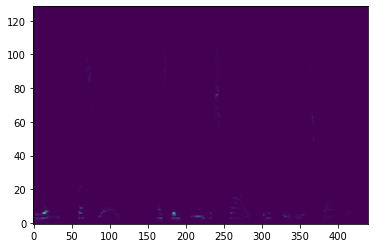

In [59]:
imshow(spectrogram, origin="lower", aspect = "auto")


!pip install git+https://github.com/AndreevP/wvmos

In [19]:
from wvmos import get_wvmos
wvmos_model = get_wvmos(cuda=True)

mos = wvmos_model.calculate_one("test.wav") # infer MOS score for one audio 

# mos = wvmos_model.calculate_dir('/media/boris/F/Research_final/notebooks/generated_audio', mean=True)

[NeMo W 2022-05-26 19:32:20 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/transformers/configuration_utils.py:356: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
      warnings.warn(
    
[NeMo W 2022-05-26 19:32:21 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/torch/nn/modules/module.py:1385: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
      warnings.warn(
    
Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2Model: ['project_q.wei

In [20]:
mos

1.695608377456665

In [ ]:
# 2.8109097300932326 DT an4 val
# 1.6962645053863525 DT ljspeech 
# 2.810892758783938
